<a href="https://colab.research.google.com/github/J1ngtin9/HW2/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1：安装常用包
!pip -q install pandas numpy matplotlib pyarrow


In [2]:
# Cell 2：读取你 GitHub 里的样本数据（保持这条 raw 链接结构不变）
import pandas as pd
url = "https://raw.githubusercontent.com/J1ngtin9/HW2/main/data/sample.csv"
df = pd.read_csv(url)
print("Shape:", df.shape)
df.head()


Shape: (200, 13)


,country,cluster_id,year.x,year.y,lat,lon,lsms_id.x,lsms_id.y,diff_of_index,index_of_diff,asset_index.x,asset_index.y,n
0,tz,1104001001,2008,2012,-9.280350,34.718552,tz_1104001001_2008,tz_1104001001_2012,0.487837,-0.102115,-0.744413,-0.256576,6
1,tz,1502020002,2008,2012,-7.817850,31.775591,tz_1502020002_2008,tz_1502020002_2012,0.283107,-0.090310,-1.685793,-1.402686,4
2,ng,1771022726,2010,2015,6.889371,8.930423,ng_1771022726_2010,ng_1771022726_2015,0.635269,1.638450,-0.534027,0.101242,3
3,ng,624240311588,2010,2015,6.645306,3.305609,ng_624240311588_2010,ng_624240311588_2015,-0.281316,-0.281037,2.924541,2.643225,4
4,ug,4100001,2009,2013,-0.608761,30.672230,ug_4100001_2009,ug_4100001_2013,-0.032185,0.994875,1.386969,1.354784,5


Pandas version: 2.2.2


,country,cluster_id,year.x,year.y,lat,lon,lsms_id.x,lsms_id.y,diff_of_index,index_of_diff,asset_index.x,asset_index.y,n
count,200,2.000000e+02,200.00000,200.00000,200.000000,200.000000,200,200,200.000000,200.000000,200.000000,200.000000,200.000000
unique,5,NaN,NaN,NaN,NaN,NaN,198,196,NaN,NaN,NaN,NaN,NaN
top,ug,NaN,NaN,NaN,NaN,NaN,ug_1050033_2005,ug_1050030_2013,NaN,NaN,NaN,NaN,NaN
freq,62,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.814600e+10,2008.73000,2013.57500,2.095574,26.389615,NaN,NaN,0.258618,0.041909,-0.184158,0.074461,6.560000
std,NaN,1.587825e+11,2.07088,2.01611,7.502900,13.142286,NaN,NaN,0.427914,0.705184,1.503947,1.476303,2.386394
min,NaN,1.020007e+06,2005.00000,2009.00000,-15.777600,3.268936,NaN,NaN,-0.670249,-1.660353,-2.584393,-2.502842,3.000000
25%,NaN,4.020016e+06,2008.00000,2012.00000,-0.773981,9.689963,NaN,NaN,-0.020457,-0.224988,-1.339805,-1.007303,5.000000
50%,NaN,1.027603e+09,2010.00000,2015.00000,2.391023,32.554895,NaN,NaN,0.248525,0.033555,-0.556535,-0.276554,6.000000
75%,NaN,7.072951e+09,2010.00000,2015.00000,7.463114,35.350978,NaN,NaN,0.552234,0.424885,1.069547,1.316201,8.000000


Timing (mean over numeric cols): 0.0024 s


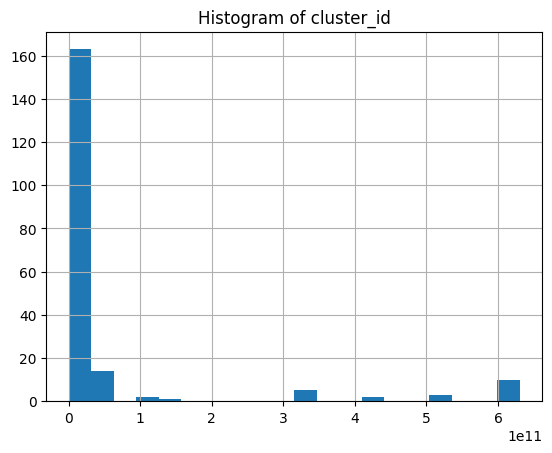

In [3]:
# Cell 3：基础系统小实验（统计 + 小图 + 计时）
import time, matplotlib.pyplot as plt
print("Pandas version:", pd.__version__)
display(df.describe(include="all"))

num_cols = df.select_dtypes(include="number").columns
if len(num_cols):
    df[num_cols[0]].hist(bins=20)
    plt.title(f"Histogram of {num_cols[0]}")

start = time.time()
_ = (df[num_cols].mean() if len(num_cols) else None)
print("Timing (mean over numeric cols):", round(time.time()-start, 4), "s")
